In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_train = train_path = '/content/drive/MyDrive/project cuoi ky/train/'
x_test = test_path = '/content/drive/MyDrive/project cuoi ky/test/'

In [4]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 3212 images belonging to 15 classes.
Found 254 images belonging to 15 classes.


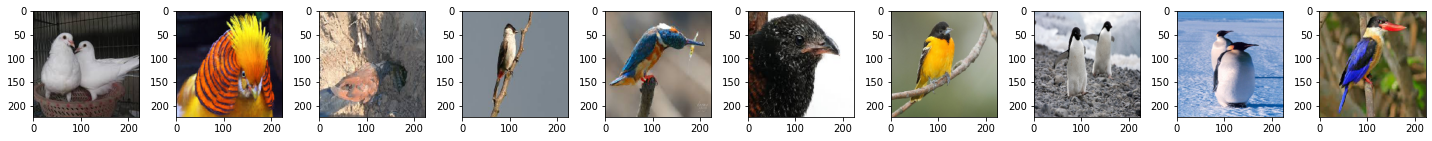

In [5]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [9]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=15, activation='softmax') ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [10]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches),validation_data=test_batches, epochs=50, verbose=1)

Epoch 1/50
322/322 [==============================] - 971s 3s/step - loss: 2.2152 - accuracy: 0.2923 - val_loss: 2.1853 - val_accuracy: 0.2362
Epoch 2/50
322/322 [==============================] - 81s 250ms/step - loss: 1.6328 - accuracy: 0.4944 - val_loss: 1.6090 - val_accuracy: 0.4882
Epoch 3/50
322/322 [==============================] - 82s 252ms/step - loss: 1.2339 - accuracy: 0.6099 - val_loss: 1.1022 - val_accuracy: 0.6339
Epoch 4/50
322/322 [==============================] - 80s 249ms/step - loss: 0.8684 - accuracy: 0.7220 - val_loss: 0.6042 - val_accuracy: 0.7874
Epoch 5/50
322/322 [==============================] - 81s 251ms/step - loss: 0.5369 - accuracy: 0.8362 - val_loss: 0.4403 - val_accuracy: 0.8425
Epoch 6/50
322/322 [==============================] - 81s 252ms/step - loss: 0.3261 - accuracy: 0.9001 - val_loss: 0.1473 - val_accuracy: 0.9409
Epoch 7/50
322/322 [==============================] - 80s 249ms/step - loss: 0.2038 - accuracy: 0.9368 - val_loss: 0.0564 - val_accu

In [11]:
 model.save('datasets.h5')

In [13]:
classify = load_model('datasets.h5')
dic = train_batches.class_indices
dic

{'bim bip': 0,
 'bo cau trang': 1,
 'boica': 2,
 'canh cut': 3,
 'chao mao': 4,
 'chim cong': 5,
 'chim cu meo': 6,
 'chim tri vang': 7,
 'chim vanganh': 8,
 'dai bang': 9,
 'haiau': 10,
 'hong hac': 11,
 'hyacinth macaw': 12,
 'thiennga': 13,
 'vetduoidai': 14}

kqua la: ['dai bang']


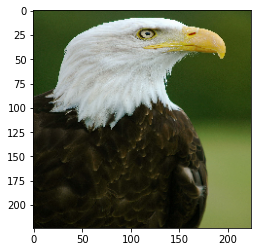

In [14]:
sample = load_img('/content/dai_bang_5.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['canh cut']


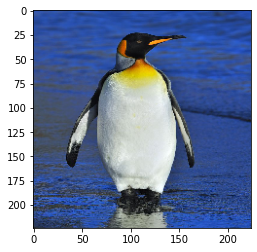

In [15]:
sample = load_img('/content/canh_cut_4.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['hong hac']


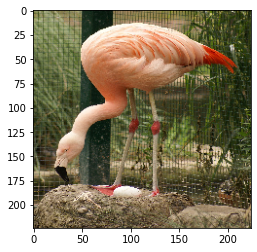

In [16]:
sample = load_img('/content/honghac_0.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['hyacinth macaw']


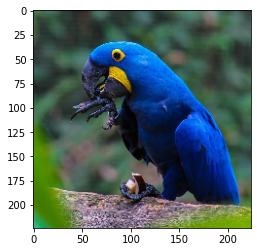

In [17]:
sample = load_img('/content/hyacinth_macaw_0.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


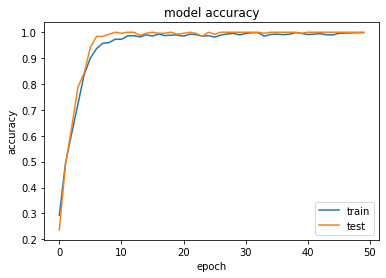

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper_left')